<h2 style="color:MediumVioletRed; font-family:Cursive"><b>Goal of creating this Notebook🎯</h2>

1. Perform Clustering / Segmentation on the dataset and identify popular customer groups along with their definitions/rules
2. Perform Location-wise analysis to identify regional trends in India
3. Perform transaction-related analysis to identify interesting trends that can be used by a bank to improve / optimi their user experiences
4. Customer Recency, Frequency, Monetary analysis
5. Network analysis or Graph analysis of customer data.

**Table of contents of this notebook: 📭**

1. [Importing Necessary Libraries](#1)

2. [Data Collection](#2)

3. [Data Cleaning](#3)

<h2  style="color:darkmagenta;text-align: center; background-color: AliceBlue;padding: 20px;">1. Importing Libraries</h2><a id = "1"></a>

In [1]:
import re
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("fivethirtyeight")
import seaborn as sns

<h2  style="color:darkmagenta;text-align: center; background-color: AliceBlue;padding: 20px;">2. Data Collection</h2><a id = "2"></a>

In [21]:
df = pd.read_csv("../../data/bank_transactions.csv")
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [9]:
df.shape

(1048567, 9)

<h2  style="color:darkmagenta;text-align: center; background-color: AliceBlue;padding: 20px;">3. Data Cleaning</h2><a id = "3"></a>

In [10]:
df.info()

In [ ]:
## Show detailes data set
def check(df):
    l=[]
    columns=df.columns
    for col in columns:
        dtypes=df[col].dtypes
        nunique=df[col].nunique()
        sum_null=df[col].isnull().sum()
        l.append([col,dtypes,nunique,sum_null])
    df_check=pd.DataFrame(l)
    df_check.columns=['column','dtypes','nunique','sum_null']
    return df_check 
check(df)

,column,dtypes,nunique,sum_null
0,TransactionID,object,1048567,0
1,CustomerID,object,884265,0
2,CustomerDOB,object,17254,3397
3,CustGender,object,3,1100
4,CustLocation,object,9355,151
5,CustAccountBalance,float64,161328,2369
6,TransactionDate,object,55,0
7,TransactionTime,int64,81918,0
8,TransactionAmount (INR),float64,93024,0


In [3]:
# delete missing data
df.dropna(inplace=True)

In [ ]:
#check for duplication
df.duplicated().sum()

0

In [4]:
# convert type of columns TransactionDate,CustomerDOB from string to datetime
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

df['CustomerDOB'] = df['CustomerDOB'].apply(lambda x: x.split('/')[0] + '/' + x.split('/')[1] + '/19' + x.split('/')[2] if len(x.split('/')[2]) == 2 else x)
df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'])

C:\Users\carlo\AppData\Local\Temp\ipykernel_1976\707959421.py:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'])


In [5]:
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5


In [7]:
df['CustomerDOB'].min()

Timestamp('1800-01-01 00:00:00')

<p> calculate customer age :</p>
<p> CustomerDOB is the birth date of the customer , TransactionDate : is the date of transaction that customer is done
</p>

In [8]:
df['CustomerAge'] =df['TransactionDate'].dt.year - df['CustomerDOB'].dt.year

<p>I will delete TransactionTime because I do not know what is Transaction of Time. ,and this time  indicates for what days or hours or minutes </p>

In [9]:
df.drop(columns=['TransactionTime'],inplace=True)

In [10]:
df.CustGender.value_counts()

M    760978
F    280635
T         1
Name: CustGender, dtype: int64

In [11]:
df.drop(df[df['CustGender']=='T'].index,inplace=True)

In [12]:
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionAmount (INR),CustomerAge
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,25.0,22
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,27999.0,59
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,459.0,20
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,2060.0,43
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,1762.5,28


In [13]:
num_col = df.select_dtypes(include=np.number)
cat_col = df.select_dtypes(exclude=np.number)

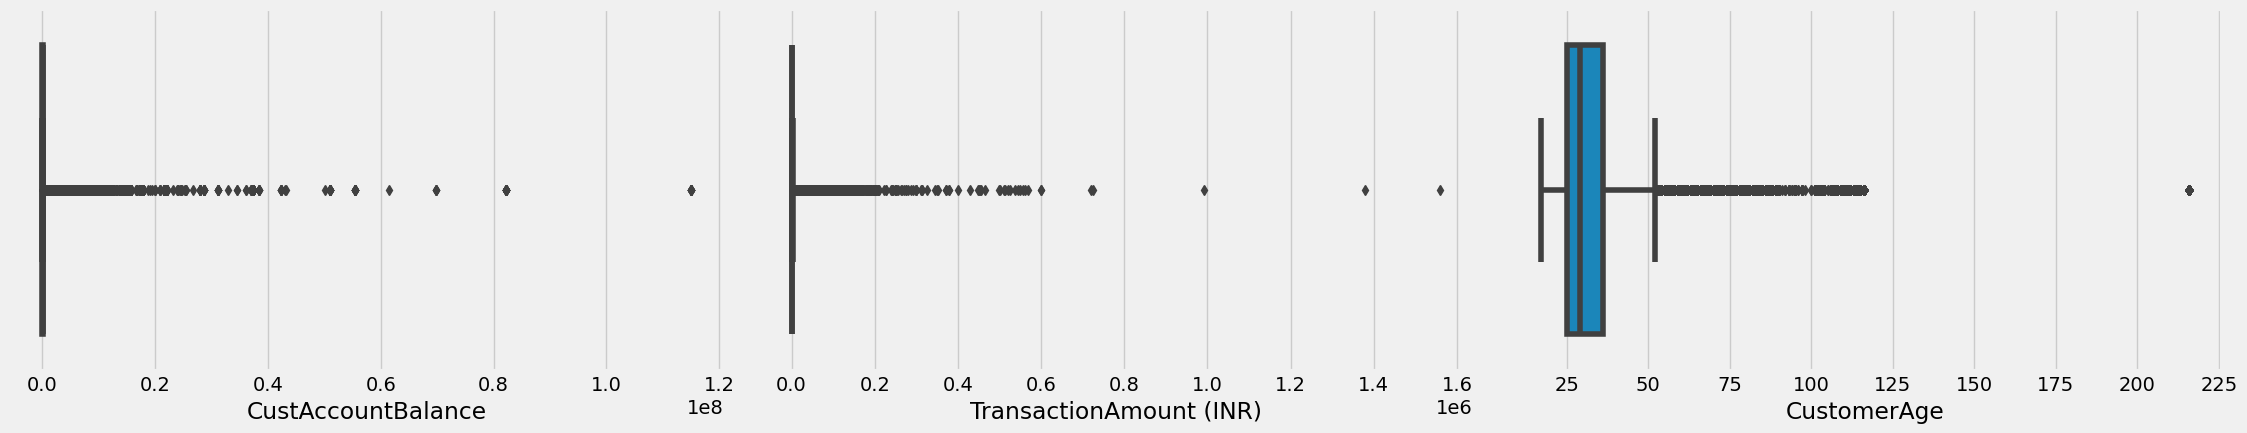

In [14]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(30,30))
for index,column in enumerate(num_col):
    plt.subplot(7,4,index+1)
    sns.boxplot(data=num_col,x=column)
    
plt.tight_layout(pad = 1.0)

<p>Clean the according to the variable CustomerAge</p>


In [15]:
df = df[(df['CustomerAge'] > 18) & (df['CustomerAge'] < 100)]

In [16]:
df.shape

(981807, 9)

In [17]:
num_col = df.select_dtypes(include=np.number)
cat_col = df.select_dtypes(exclude=np.number)

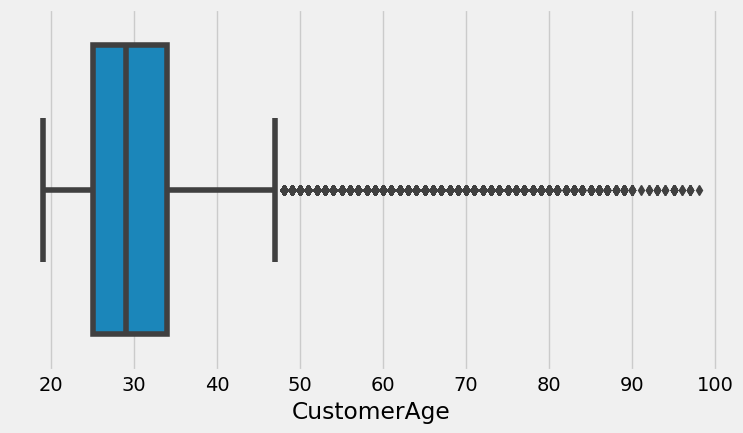

In [18]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(30,30))
plt.subplot(7,4,1)
sns.boxplot(data=num_col,x='CustomerAge') 
plt.tight_layout(pad = 1.0)